# Web_Scrapping_and_Youtube_ABSA

###### In this project I have decided to see the sentiment of people supporting the opening of Georgia during the pandemic from two new channels on youtube ABC News and NBC News

## WebScrapping

In [96]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import csv
import string
import regex as re

In [18]:
driver = webdriver.Chrome(ChromeDriverManager().install())
link = input("Copy past the youtube link here")
driver.get(link)
driver.maximize_window()
time.sleep(5)
title = driver.find_element_by_xpath('//*[@id="container"]/h1/yt-formatted-string').text
print("Video Title: " + title)
print("-------------------------------------------------------------------------------------------------------------------")

comment_section = driver.find_element_by_xpath('//*[@id="comments"]')
driver.execute_script("arguments[0].scrollIntoView();", comment_section)
time.sleep(7)

last_height = driver.execute_script("return document.documentElement.scrollHeight")
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);")

    # Wait to load page
    time.sleep(2)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.documentElement.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

driver.execute_script("window.scrollTo(0, document.documentElement.scrollHeight);") #driver.execute_script() is used to run a java script in selenium

emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"
                           u"\U0001F680-\U0001F6FF"
                           u"\U0001F1E0-\U0001F1FF"
                           "]+", flags=re.UNICODE)
username_list = []
comment_list = []
name_elems=driver.find_elements_by_xpath('//*[@id="author-text"]')
comment_elems = driver.find_elements_by_xpath('//*[@id="content-text"]')
num_of_names = len(name_elems)
for i in range(num_of_names):
    username = name_elems[i].text    # .replace(",", "|")
    comment = comment_elems[i].text    # .replace(",", "|")
    username_list.append(username)
    comment_list.append(comment)
        
    print(username + ": " + comment) # comment.translate({ord(i):None for i in '' if i not in string.printable})
    print("-------------------------------------------------------------------------------------------------------------------")

driver.close()


Looking for [chromedriver 81.0.4044.69 mac64] driver in cache 
File found in cache by path [/Users/rahul/.wdm/drivers/chromedriver/81.0.4044.69/mac64/chromedriver]
Copy past the youtube link herehttps://www.youtube.com/watch?v=XTeOrGIerV4
Video Title: Atlanta business owners express mixed feelings about Georgia reopening
-------------------------------------------------------------------------------------------------------------------
the tater: Everyone has to buy groceries, bowling is not as important to me anyways.
-------------------------------------------------------------------------------------------------------------------
LUCKY: I’ll stay in and let the first people go out first. If they make it then I’ll go out
-------------------------------------------------------------------------------------------------------------------
jarednil69: It's ironic that the first salon customers have the shortest hair.
------------------------------------------------------------------------

fibsernum30: Since the only things that have helped slow the rate of infections and deaths have been staying apart and wearing masks, why wouldn't we expect the rate to start climbing again if we stop doing those things? Can someone explain why, in the absence of testing and effective treatments or a vaccine, it is ok to return to normal? I seem to be missing something.
-------------------------------------------------------------------------------------------------------------------
Rich Richie: The translator i don’t trust after all these liars ahahah
-------------------------------------------------------------------------------------------------------------------
James Howard: @1:40 is that Poussey Washington from Orange is the new Black?
-------------------------------------------------------------------------------------------------------------------
Nt Tadese: Segregation is coming up on US future
----------------------------------------------------------------------------------

Richard L: Fox News only interview business that like the idea and don't bother ask anyone who disagree.
-------------------------------------------------------------------------------------------------------------------
써니의_가발가게: Mr.Santa got his summer job
-------------------------------------------------------------------------------------------------------------------
Henry Marin: The level of ignorance of these Governors. Is ridiculous 🤦🏽‍♂️
-------------------------------------------------------------------------------------------------------------------
En P: Well men should have taken this chance to shave there heads
-------------------------------------------------------------------------------------------------------------------
thedonleroy: How in the world are movie theaters & bowling alleys important enough to be among the first businesses to reopen?
-------------------------------------------------------------------------------------------------------------------
April83:

John A Vallone: One is too many  . But how many believe that the number of deaths are about 25% off?
-------------------------------------------------------------------------------------------------------------------
L. S: Propaganda
-------------------------------------------------------------------------------------------------------------------
ConTroller: Trump covid 19 octopus soup, made from highly trained team of octopuses specialized in combating covid 19, prior to being cooked. Did Mike pence just apologized for Trump's remarks and Trump got upset and walked out of the briefing? Is he going to fire Mike Pence too?
-------------------------------------------------------------------------------------------------------------------
rivernorthhomes: What good is staying closed another month..the virus will still be there waiting outside. USA took the wrong approach, but keeping everyone locked inside you are just delaying the inevitable when they are free to go out. Sweden took the

-------------------------------------------------------------------------------------------------------------------
Truth Hurts: "If Georgia opens up then everybody is gonna die!"
Yeah, I guess that's why grocery stores are all open and you can buy raw, unwrapped fruits and veggies that people have been coughing and sneezing all over and nobody is dying.🤣🤣🤣🤣🤣hsjz
-------------------------------------------------------------------------------------------------------------------
Jonathan OBrien: Medical malpractice kills 440k on average a year! 2.8 million Americans die a year! How many stadiums is that lmfao get the duck out hear with your manipulating ass
-------------------------------------------------------------------------------------------------------------------
batsonelec C: I live in SC. The fact so many are not wearing masks and doing the simple things to not spread this is going to kill many thousands more. If everyone was taking it seriously and protecting themselves and ot

Denise Wright: I wouldn't subscribe ABC if you paid me too very dissapointing news station
-------------------------------------------------------------------------------------------------------------------
punks not dead: Sorry,  but I'm a massage therapist. (Not in Georgia) and there's no way im giving anybody a massage right now.  Too soon and you CANNOT social distance in that profession, PERIOD! 
(posted by unemployed with NO INCOME from March 11th.)
-------------------------------------------------------------------------------------------------------------------
Dylan-Christopher Massie: of course the actual people of Atlanta are concerned, it's the only place in Georgia that actually contributes anything to the US economy.  And the governor doesn't do anything that actually makes Georgia money, he just leeches off of it.
-------------------------------------------------------------------------------------------------------------------
Lonnie Smith: Trump straight outlier Becaus

Derek Gabrys: Why is mainstream news always trying to push delaying opening any business like forever? They clearly don't seem to want the country to succeeed and this virus to fizzle out. It isn't going to go away by everyone hiding in their houses all year. Why do Atlanta business owners care if the state opens up? They don't have to open their business if they feel uncomfortable. People who want to wear masks and stay 6 feet from everyone the rest of their life they are entitled to do that. Sounds like a wonderful way to live. Scared and isolated from all friends, loved ones, and the rest of society. I'd rather take my chances with the virus that 98-99 percent will recover from or maybe not even show any symptoms.
-------------------------------------------------------------------------------------------------------------------
Arroway2357: Note that every newscaster you're listening to still has a paycheck.
I work in an Atlanta grocery store. We've been open the whole time and no o

bpxl53yewz: Although the governor wanted all these places open, interesting that many of them chose not to and their staff thanked the owners. He's not the one who has to work and come in contact with many others, they are. Easy for him to say "go back to work". Georgia was only in shelter-in for 3 wks. That's nothing.
-------------------------------------------------------------------------------------------------------------------
Zinxeb Zinxeb: Georgia and all of the rest of red states gave all of their state's revenue to their wealthy campaign donors...so they can't afford to pay unemployment to keep their residents home and safe.
-------------------------------------------------------------------------------------------------------------------
Dalai Lama: I heard eating watermelons helps with receding hairlines.
🍉🍉🍉🍉🍉🍉🍉🍉🍉🍉🍉🍉🍉🍉🍉🍉🍉🍉🍉
-------------------------------------------------------------------------------------------------------------------
Warren Goss: Stay closed and loose 

In [19]:
ABC = pd.DataFrame({'User_Name':username_list,'Comment':comment_list}) 

In [16]:
#NBC.to_csv('NBC.csv', index=False)

In [20]:
#ABC.to_csv('ABC.csv', index=False)

In [21]:
ABC.shape

(447, 2)

###### Now Since we have collected the data from youtube lets run ABSA

In [203]:
#Import lib for ABSA
%matplotlib inline
from textblob import TextBlob, Word
import textblob
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import pandas as pd

import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
from contractions import CONTRACTION_MAP
import unicodedata
nlp = spacy.load('en_core_web_sm', parse = True, tag=True, entity=True)
from wordcloud import WordCloud, STOPWORDS
from nltk import word_tokenize, pos_tag, pos_tag_sents

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.max_colwidth = 1000
import spacy
from spacy import displacy

#### Since a generalized list of stop words hurt the performance of the sentiment. I am customizing the list as per the dataset. I will be removing a certain words from the NLTK stop word list

In [13]:
tokenizer = ToktokTokenizer()
stopword_list = set(nltk.corpus.stopwords.words('english')) - { 'you','no','not',"couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}


In [42]:
#Reading Data
nbc = pd.read_csv('NBC.csv')
abc = pd.read_csv('ABC.csv')

In [43]:
nbc.head(10)

,User_Name,Comment
0,Butterfly,"The only positive thing I see is cleanliness is being taken to a whole new level, but distancing is forfeited."
1,Oasis5,So where does everyone go after getting their hair and nails done? Home?
2,3LD,"Governor Kemp is brilliant, this is the same clown who claims to have not known the virus could lie dormant for up to 14 days with no symptoms. This is crazy."
3,Oasis5,How come we don't see Kemp out visiting some of these reopened businesses???
4,Brrr_Ice,What a good experiment at least it’s not my state.
5,SilentWolf 655,Gyms: 80% chance of catching COVID-19\nWalking: 0% chance of catching COVID-19
6,gbutreasful,I’m ready to die for the American empire 💀☠️💀☠️💀
7,Chris Cohea,If they are afraid of the virus why are they protesting?
8,Johnny C,"Just before being put on a ventilator, a man was quoted ""at least I don't look like a caveman."" 🤨"
9,Stick 13,Hey Georgia do us all a favor. Stay in your state. Don’t infect the rest of us.


In [44]:
abc.head(2)

,User_Name,Comment
0,the tater,"Everyone has to buy groceries, bowling is not as important to me anyways."
1,LUCKY,I’ll stay in and let the first people go out first. If they make it then I’ll go out


#### Here we will be splitting each sentenses of the comments for a better analysis

In [45]:
split_abc = pd.DataFrame(abc.Comment.str.split('.').tolist(), index=abc.User_Name).stack()
split_nbc = pd.DataFrame(nbc.Comment.str.split('.').tolist(), index=nbc.User_Name).stack()

In [46]:
split_abc.head()

User_Name    
the tater   0    Everyone has to buy groceries, bowling is not as important to me anyways
            1                                                                            
LUCKY       0                          I’ll stay in and let the first people go out first
            1                                            If they make it then I’ll go out
jarednil69  0           It's ironic that the first salon customers have the shortest hair
dtype: object

In [47]:
split_nbc.head()

User_Name   
Butterfly  0                                     The only positive thing I see is cleanliness is being taken to a whole new level, but distancing is forfeited
           1                                                                                                                                                  
Oasis5     0                                                                          So where does everyone go after getting their hair and nails done? Home?
3LD        0    Governor Kemp is brilliant, this is the same clown who claims to have not known the virus could lie dormant for up to 14 days with no symptoms
           1                                                                                                                                     This is crazy
dtype: object

In [49]:
#Reindexing
split_abc = split_abc.reset_index([0, 'User_Name'])
split_nbc = split_nbc.reset_index([0, 'User_Name'])

In [51]:
#Re-naming column
split_abc.columns = ['User_Name', 'Comments']
split_nbc.columns = ['User_Name', 'Comments']

 
Since we are not worried about the user name. We will be moving comments into new df

In [52]:
data_abc = split_abc[['Comments']]
data_nbc = split_nbc[['Comments']]

In [53]:
#Basic cleaning
com_abc = []
for doc in data_abc.Comments:
        
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc) # remove extra newlines
    
    com_abc.append(doc)
    
data_abc["Comments"] = com_abc
 

com_nbc = []
for doc in data_nbc.Comments:
        
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc) # remove extra newlines
    
    com_nbc.append(doc)
    
data_nbc["Comments"] = com_nbc
 

/Users/rahul/.conda/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/rahul/.conda/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [54]:
full_data_abc = pd.DataFrame(data_abc, columns = ['Comments']) 
full_data_nbc = pd.DataFrame(data_nbc, columns = ['Comments']) 

## Data Cleaning

#### Helper Function

In [55]:
# Accented Characters
# remove_accented_chars('Sómě Áccěntěd těxt')
# 'Some Accented text'

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

# -----------------------------------------------------------------------------------------------------------

# HTML Tags
# strip_html_tags('<html><h2>Some important text</h2></html>')
# 'Some important text'
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

# -----------------------------------------------------------------------------------------------------------


# Expanding Contractions
# expand_contractions("Y'all can't expand contractions I'd think")
#'You all cannot expand contractions I would think'
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

# -----------------------------------------------------------------------------------------------------------


# Remove Special Characters
# remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)
#'Well this was fun What do you think '

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

# -----------------------------------------------------------------------------------------------------------

# Text Lemmatization
# lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")
#'My system keep crash ! his crash yesterday , ours crash daily'

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

# -----------------------------------------------------------------------------------------------------------

# Stop Words
# remove_stopwords("The, and, if are stopwords, computer is not")
# ', , stopwords , computer not'


def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#-----------------------------------------------------------------------------------------------------------

In [57]:
#For ABC News
clean_comment_abc = []
for doc in data_abc.Comments:
    doc = strip_html_tags(doc)  # strip HTML
    doc = remove_accented_chars(doc)         # remove accented characters
    doc = expand_contractions(doc) # expand contractions
    doc = doc.lower() # lowercase the text
    #doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc) # remove extra newlines
    doc = lemmatize_text(doc)   # lemmatize text
    doc = remove_special_characters(doc, remove_digits = True)  # remove special characters and\or digits
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc) # remove extra newlines
    doc = re.sub(' +', ' ', doc) # remove extra whitespace
    doc = remove_stopwords(doc) # remove stopwords
    clean_comment_abc.append(doc)
    
data_abc["clean_comment"] = clean_comment_abc

#For NBC News
clean_comment_nbc = []
for doc in data_nbc.Comments:
    doc = strip_html_tags(doc)  # strip HTML
    doc = remove_accented_chars(doc)         # remove accented characters
    doc = expand_contractions(doc) # expand contractions
    doc = doc.lower() # lowercase the text
    #doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc) # remove extra newlines
    doc = lemmatize_text(doc)   # lemmatize text
    doc = remove_special_characters(doc, remove_digits = True)  # remove special characters and\or digits
    doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc) # remove extra newlines
    doc = re.sub(' +', ' ', doc) # remove extra whitespace
    doc = remove_stopwords(doc) # remove stopwords
    clean_comment_nbc.append(doc)
    
data_nbc["clean_comment"] = clean_comment_nbc



# Later Purpose need to remove single words

#### Handling Empty Rows

In [60]:
data_abc = data_abc[data_abc.clean_comment != '']

data_nbc = data_nbc[data_nbc.clean_comment != '']

## Sentiment Analysis using TextBlob

In [61]:
#For ABC News
sentiment_scores = [round(TextBlob(article).sentiment.polarity, 3) for article in data_abc['clean_comment']]
sentiment_category = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores]

data_abc['Sentiment_Polarity'] = sentiment_scores
data_abc['Sentiment_Category'] = sentiment_category

#For NBC News
sentiment_scores = [round(TextBlob(article).sentiment.polarity, 3) for article in data_nbc['clean_comment']]
sentiment_category = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores]

data_nbc['Sentiment_Polarity'] = sentiment_scores
data_nbc['Sentiment_Category'] = sentiment_category

/Users/rahul/.conda/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/rahul/.conda/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/rahul/.conda/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

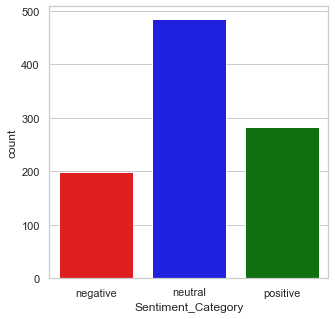

In [64]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Category", data=data_abc, 
                  palette=dict(neutral="blue", positive="Green", negative="Red"))

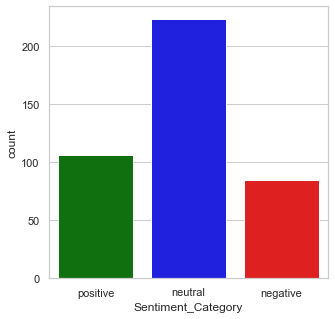

In [65]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Category", data=data_nbc, 
                  palette=dict(neutral="blue", positive="Green", negative="Red"))

### Most Common Words

In [66]:
word_dist_abc = nltk.FreqDist(data_abc['clean_comment'])
top100_words_abc = pd.DataFrame(word_dist_abc.most_common(100),
                    columns=['Word', 'Frequency'])

word_dist_nbc = nltk.FreqDist(data_nbc['clean_comment'])
top100_words_nbc = pd.DataFrame(word_dist_nbc.most_common(100),
                    columns=['Word', 'Frequency'])

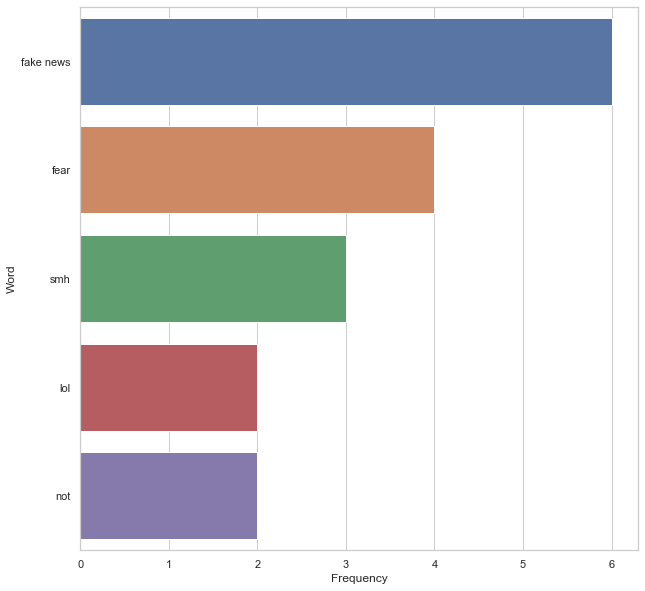

In [67]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words_abc.head(5))

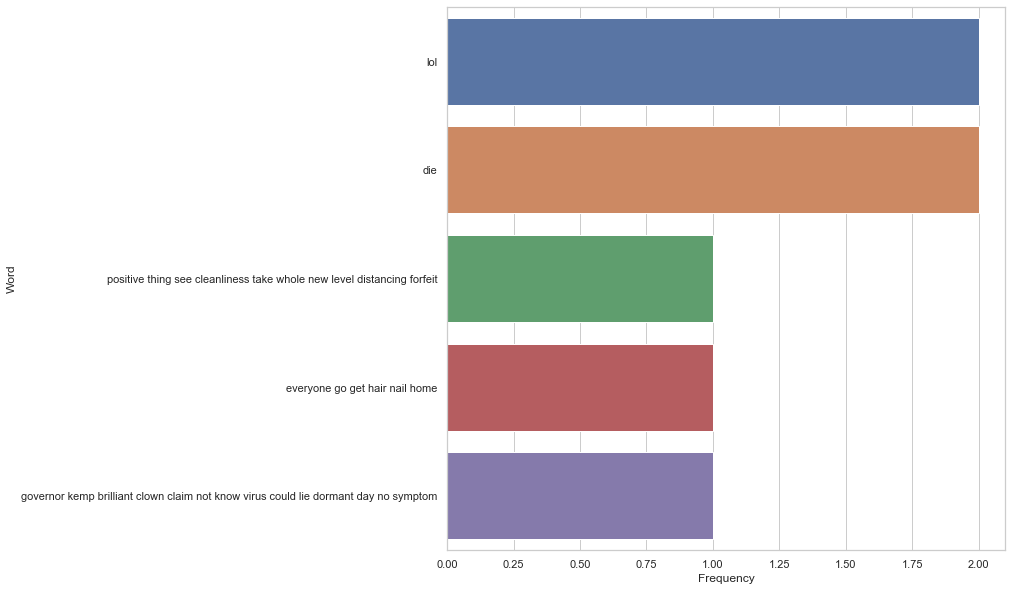

In [68]:
plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Frequency",y="Word", data=top100_words_nbc.head(5))

### Representing Common Words in Word Cloud

In [69]:
#helper function
def wc(data,bgcolor,title):
    plt.figure(figsize = (80,80))
    wc = WordCloud(background_color = bgcolor, max_words = 100,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

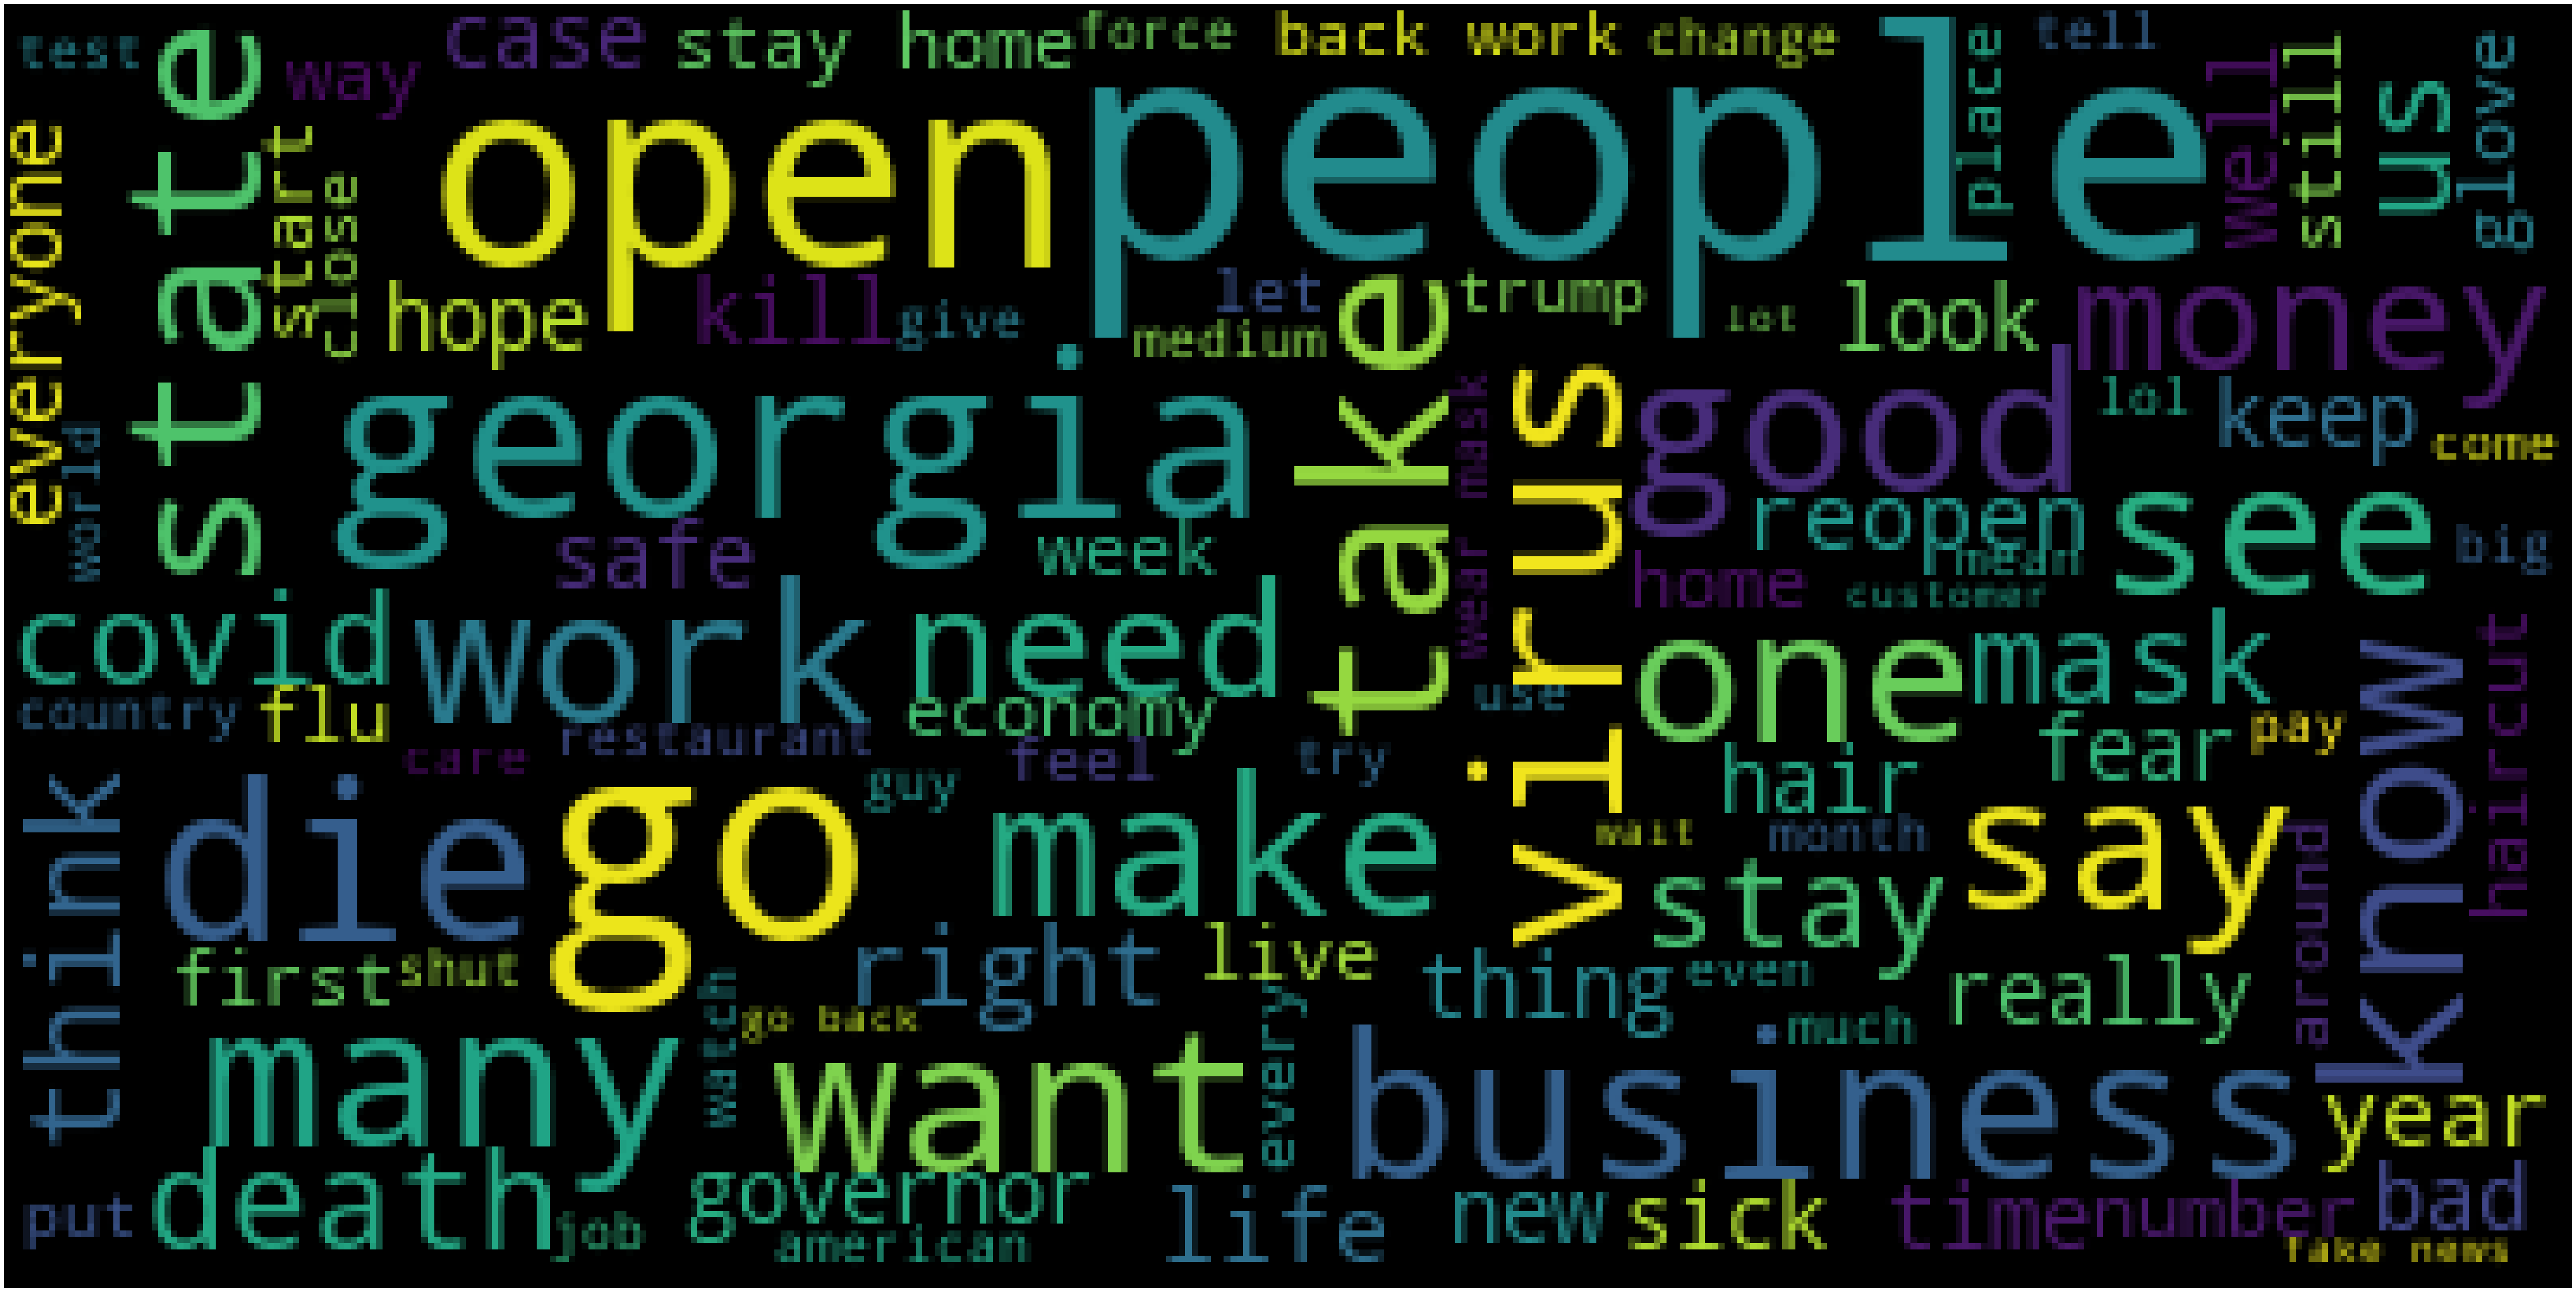

In [70]:
wc(data_abc['clean_comment'],'black','Common Words' )

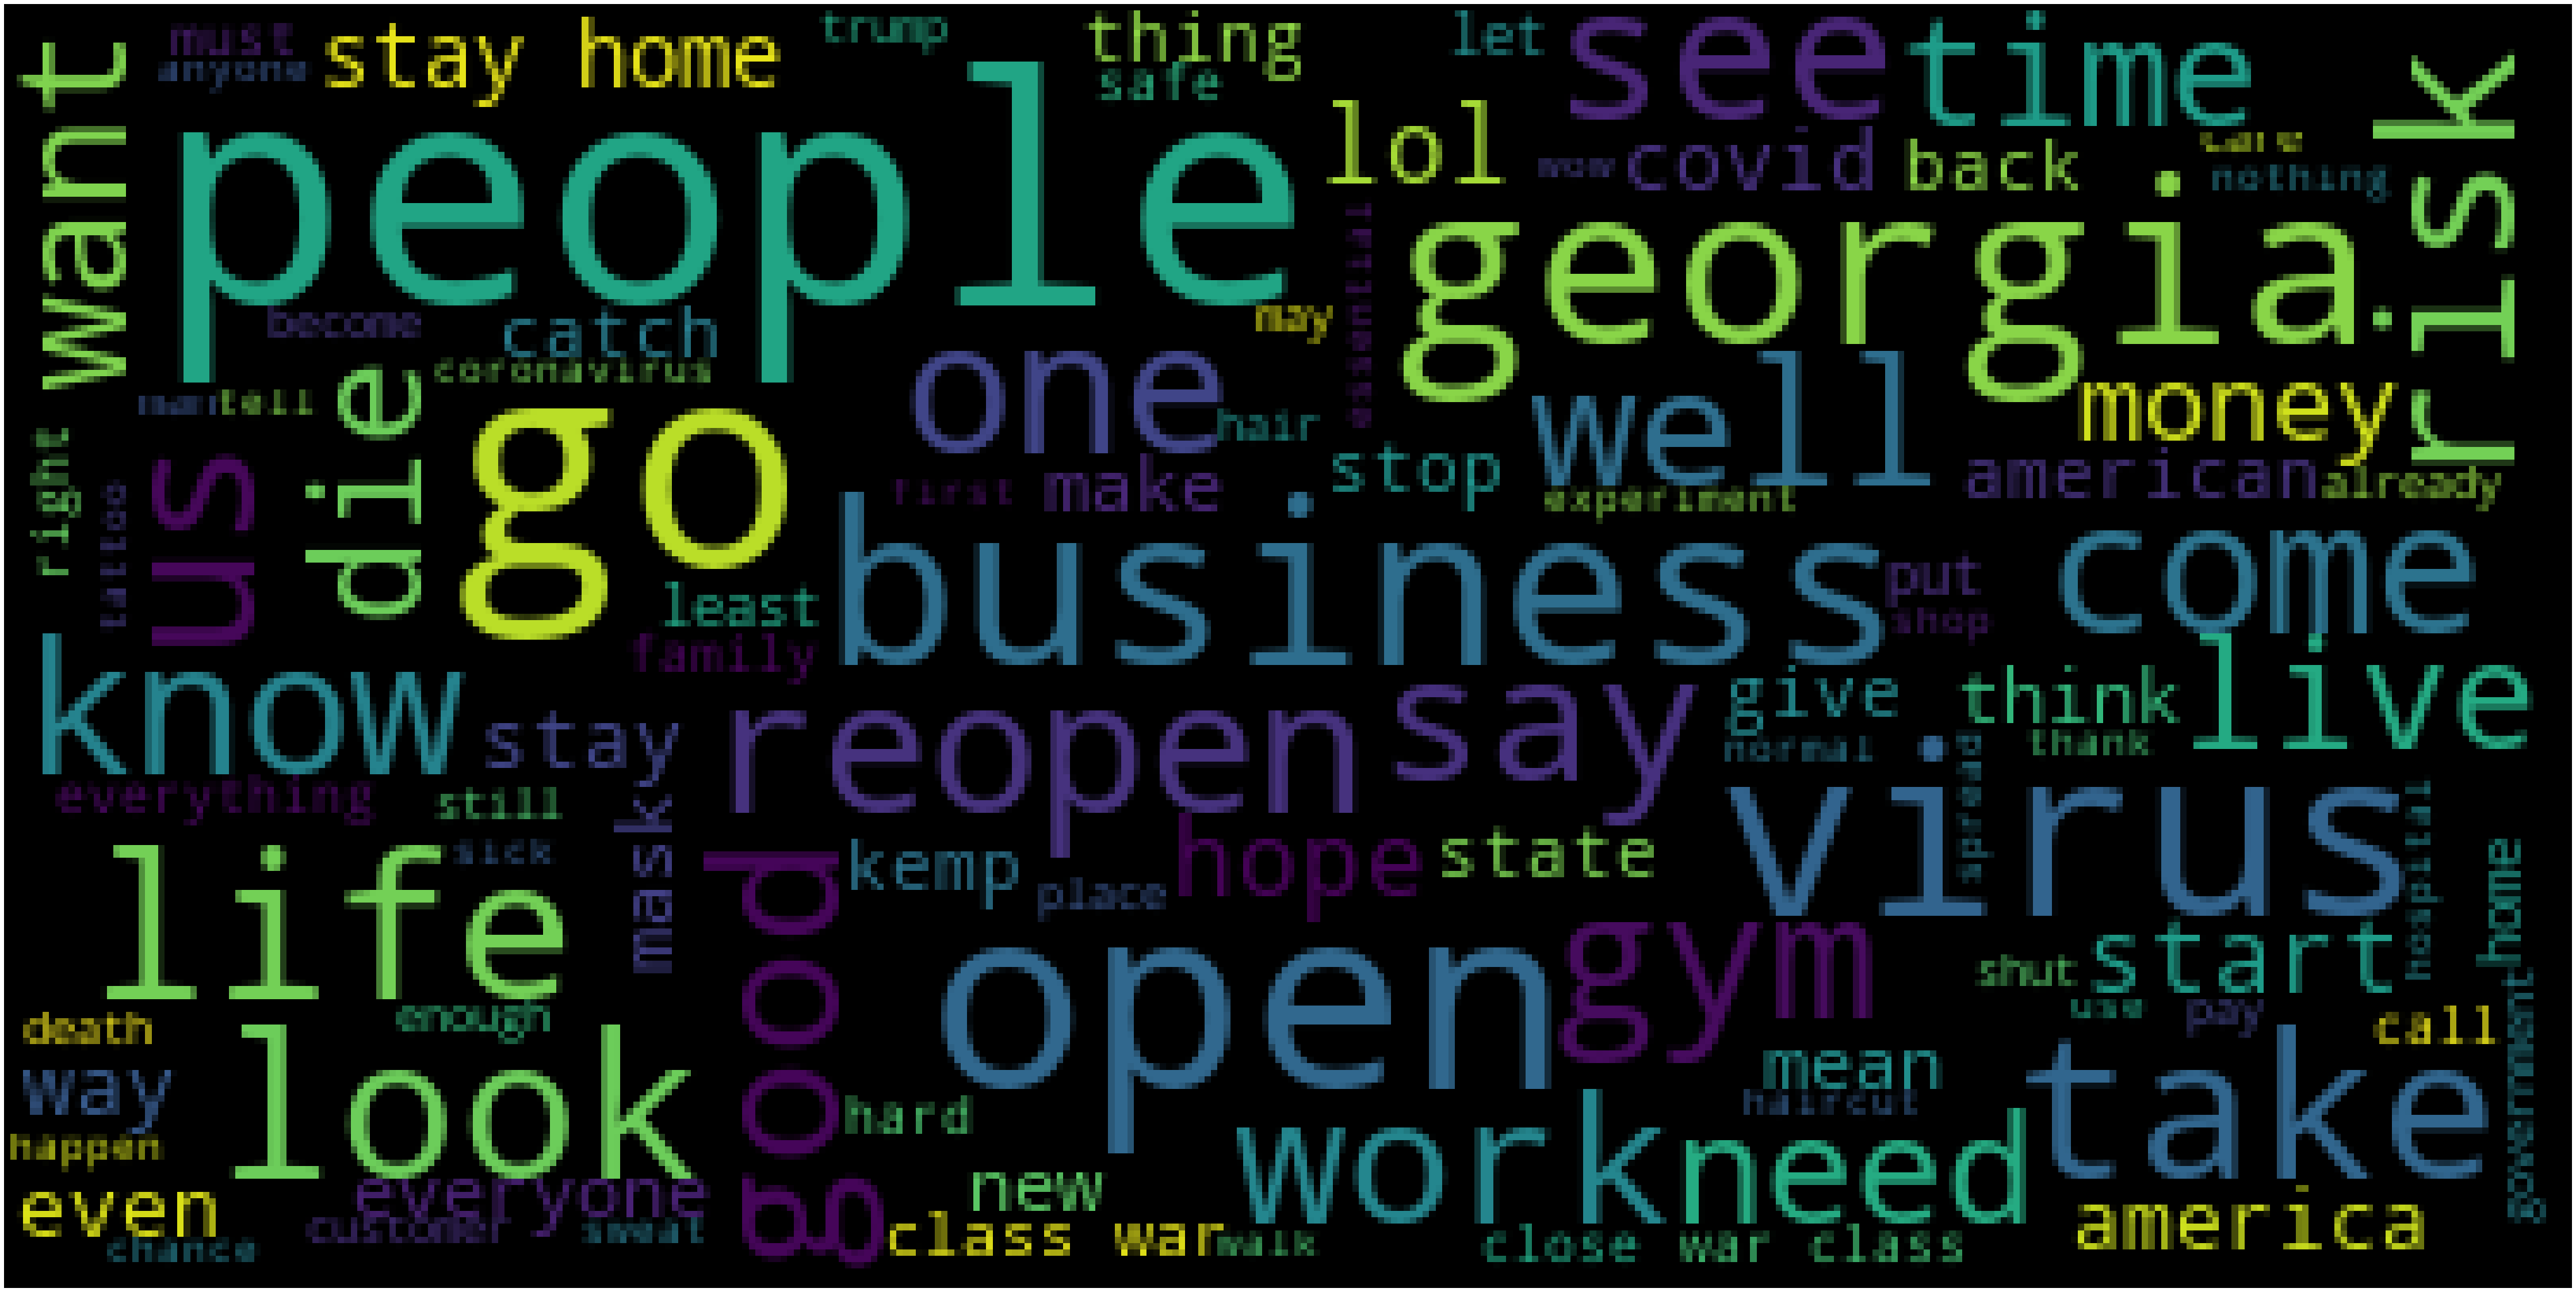

In [71]:
wc(data_nbc['clean_comment'],'black','Common Words' )

## Aspect Mining or Opinion Mining

In [72]:
#helper function
def pos(text):
    doc = nlp(text)
    # You want list of Verb tokens 
    aspects = [token.text for token in doc if token.pos_ == "NOUN"]
    return aspects

In [73]:
data_abc["Aspects"] = data_abc["clean_comment"].apply(pos)
data_nbc["Aspects"] = data_nbc["clean_comment"].apply(pos)

/Users/rahul/.conda/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/rahul/.conda/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


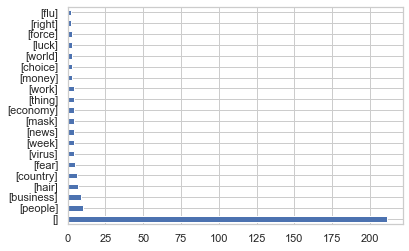

In [74]:
data_abc['Aspects'].value_counts()[:20].plot(kind='barh')

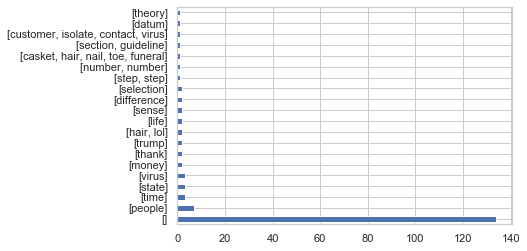

In [75]:
data_nbc['Aspects'].value_counts()[:20].plot(kind='barh')

## Parts of Speech Tagging (POS)

In [78]:
#Converting into a list format
#For ABC News

pos_comment_abc = []
for doc in full_data_abc.Comments:
    doc = strip_html_tags(doc)  # strip HTML
    doc = remove_accented_chars(doc)         # remove accented characters
    doc = expand_contractions(doc) # expand contractions
    #doc = doc.lower() # lowercase the text
    #doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc) # remove extra newlines
    doc = lemmatize_text(doc)   # lemmatize text
    doc = remove_special_characters(doc, remove_digits = False)  # remove special characters and\or digits
    doc = tokenizer.tokenize(doc)
    #doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc) # remove extra newlines
    #doc = re.sub(' +', ' ', doc) # remove extra whitespace
    #doc = remove_stopwords(doc) # remove stopwords
    pos_comment_abc.append(doc)
    
full_data_abc["pos_comment"] = pos_comment_abc
pos_list_abc = full_data_abc["pos_comment"].tolist()
pos_list_abc = [item for items in pos_list_abc for item in items]

#For NBC News

pos_comment_nbc = []
for doc in full_data_nbc.Comments:
    doc = strip_html_tags(doc)  # strip HTML
    doc = remove_accented_chars(doc)         # remove accented characters
    doc = expand_contractions(doc) # expand contractions
    #doc = doc.lower() # lowercase the text
    #doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc) # remove extra newlines
    doc = lemmatize_text(doc)   # lemmatize text
    doc = remove_special_characters(doc, remove_digits = False)  # remove special characters and\or digits
    doc = tokenizer.tokenize(doc)
    #doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc) # remove extra newlines
    #doc = re.sub(' +', ' ', doc) # remove extra whitespace
    #doc = remove_stopwords(doc) # remove stopwords
    pos_comment_nbc.append(doc)
    
full_data_nbc["pos_comment"] = pos_comment_nbc
pos_list_nbc = full_data_nbc["pos_comment"].tolist()
pos_list_nbc = [item for items in pos_list_nbc for item in items]

In [79]:
#POS Tagging
#For ABC News
pos_tag_abc = pos_tag_sents(map(word_tokenize, pos_list_abc))
pos_tag_abc = pd.DataFrame(pos_tag_abc) 

#For NBC News

pos_tag_nbc = pos_tag_sents(map(word_tokenize, pos_list_nbc))
pos_tag_nbc = pd.DataFrame(pos_tag_nbc) 

## Name Entity Creation

In [81]:
#Helper Function 
#converting list to string
def listToString(s):    
    # initialize an empty string 
    str1 = " "    
    # return string   
    return (str1.join(s)) 
pos_str_abc = listToString(pos_list_abc) 
pos_str_nbc = listToString(pos_list_nbc) 

In [82]:
#For ABC News
sentence_nlp_abc = nlp(pos_str_abc)

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp_abc if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp_abc, style='ent', jupyter=True)

[(first, 'ORDINAL'), (first, 'ORDINAL'), (Ill, 'GPE'), (first, 'ORDINAL'), (50000, 'CARDINAL'), (000, 'CARDINAL'), (20, 'CARDINAL'), (Kemp, 'PERSON'), (Esthetician, 'NORP'), (Imma, 'GPE'), (the, 'DATE'), (next, 'DATE'), (3, 'DATE'), (week, 'DATE'), (Kemp, 'PERSON'), (Estasistens, 'PRODUCT'), (920, 'PRODUCT'), (Colorado, 'FAC'), (Ahem, 'FAC'), (Americans, 'NORP'), (YouTube, 'ORG'), (Sweden, 'GPE'), (Sweden, 'GPE'), (Smh, 'ORG'), (first, 'ORDINAL'), (6, 'QUANTITY'), (foot, 'QUANTITY'), (250, 'CARDINAL'), (2, 'DATE'), (week, 'DATE'), (533, 'CARDINAL'), (115, 'CARDINAL'), (second, 'ORDINAL'), (lol, 'DATE'), (5, 'DATE'), (week, 'DATE'), (only, 'CARDINAL'), (two, 'CARDINAL'), (to, 'CARDINAL'), (three, 'CARDINAL'), (Bravo, 'FAC'), (436, 'FAC'), (Georgia, 'GPE'), (315, 'CARDINAL'), (AOC, 'ORG'), (Jesus, 'PERSON'), (God, 'PERSON'), (OKLAHOMA, 'ORG'), (318, 'CARDINAL'), (John, 'PERSON'), (ioneddis, 'PERSON'), (Stanford, 'ORG'), (University, 'ORG'), (cv19, 'ORG'), (Omg, 'ORG'), (6, 'QUANTITY'), (

In [83]:
#For NBC News
sentence_nlp_nbc = nlp(pos_str_nbc)

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp_nbc if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp_nbc, style='ent', jupyter=True)

[(Kemp, 'PERSON'), (up, 'DATE'), (to, 'DATE'), (14, 'DATE'), (day, 'DATE'), (Kemp, 'PERSON'), (80, 'CARDINAL'), (0, 'CARDINAL'), (american, 'NORP'), (Georgia, 'GPE'), (130, 'CARDINAL'), (Bowling, 'PERSON'), (american, 'NORP'), (50, 'CARDINAL'), (0, 'CARDINAL'), (Cmon, 'ORG'), (a, 'DATE'), (year, 'DATE'), (a, 'QUANTITY'), (ton, 'QUANTITY'), (the, 'DATE'), (upcoming, 'DATE'), (month, 'DATE'), (thousand, 'CARDINAL'), (138, 'CARDINAL'), (Kemp, 'PERSON'), (144, 'CARDINAL'), (Kemp, 'PERSON'), (2, 'MONEY'), (cent, 'MONEY'), (Rona, 'PERSON'), (19, 'CARDINAL'), (Georgia, 'GPE'), (Hokkaido, 'PERSON'), (Japans, 'PERSON'), (second, 'ORDINAL'), (about, 'DATE'), (21, 'DATE'), (day, 'DATE'), (Georgia, 'GPE'), (Wwaaaittt, 'ORG'), (Atlanta, 'GPE'), (Georgia, 'GPE'), (Mike, 'PERSON'), (Pence, 'PERSON'), (Smdh, 'PRODUCT'), (008, 'CARDINAL'), (first, 'ORDINAL'), (Rona, 'PERSON'), (thousand, 'CARDINAL'), (Marys, 'GPE'), (first, 'ORDINAL'), (N95, 'ORG'), (Georgia, 'GPE'), (america, 'GPE'), (Bunch, 'PERSON')

In [86]:
#For ABC 
#most frequent name entitiy
from nltk.corpus import conll2000
named_entities_abc = []
for sentence in pos_comment_abc:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(pos_str_abc)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities_abc.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame_abc = pd.DataFrame(named_entities_abc, 
                            columns=['Entity Name', 'Entity Type'])

#For NBC 
#most frequent name entitiy
from nltk.corpus import conll2000
named_entities_nbc = []
for sentence in pos_comment_nbc:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(pos_str_nbc)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities_nbc.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame_nbc = pd.DataFrame(named_entities_nbc, 
                            columns=['Entity Name', 'Entity Type'])

In [87]:
#Will be using this entity to filter the top 15
# get the top named entities
top_entities_abc = (entity_frame_abc.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities_abc.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,Georgia,first,US,one,19,America,Sweden,Atlanta,ABC,american,Kemp,China,6 foot,Trump,six foot
Entity Type,GPE,ORDINAL,GPE,CARDINAL,CARDINAL,GPE,GPE,GPE,ORG,NORP,PERSON,GPE,QUANTITY,PERSON,QUANTITY
Frequency,63540,19768,11296,11296,11296,9884,9884,8472,8472,7060,7060,5648,5648,5648,5648


In [88]:
#Will be using this entity to filter the top 15
# get the top named entities
top_entities_nbc = (entity_frame_nbc.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities_nbc.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,Georgia,America,Kemp,first,Americans,80,one,american,second,USA,Ga,NWO,Rona,thousand,Democrat
Entity Type,GPE,GPE,PERSON,ORDINAL,NORP,CARDINAL,CARDINAL,NORP,ORDINAL,GPE,GPE,ORG,PERSON,CARDINAL,NORP
Frequency,12420,4347,3726,3105,1863,1863,1863,1863,1242,1242,1242,1242,1242,1242,1242


### Deep mining using the most used Entity

In [195]:
#For ABC News 

index_abc=data_abc['Comments'].str.match(r'(?=.*\ Georgia\b).*$')
texts_abc=data_abc['Comments'].loc[index_abc].tolist()
noun_abc=[]
verb_abc=[]
for doc in nlp.pipe(texts_abc,n_threads=16,batch_size=10000):
    try:
        for c in doc:
            if c.pos_=="NOUN":
                noun_abc.append(c.text)
            elif c.pos_=="VERB":
                verb_abc.append(c.text)            
    except:
        noun_abc.append("")
        verb_abc.append("")
        
#For NBC News 
index_nbc=data_nbc['Comments'].str.match(r'(?=.*\ Georgia\b).*$')
texts_nbc=data_nbc['Comments'].loc[index_nbc].tolist()
noun_nbc=[]
verb_nbc=[]
for doc in nlp.pipe(texts_nbc,n_threads=16,batch_size=10000):
    try:
        for c in doc:
            if c.pos_=="NOUN":
                noun_nbc.append(c.text)
            elif c.pos_=="VERB":
                verb_nbc.append(c.text)            
    except:
        noun_nbc.append("")
        verb_nbc.append("")


([], <a list of 0 Text yticklabel objects>)

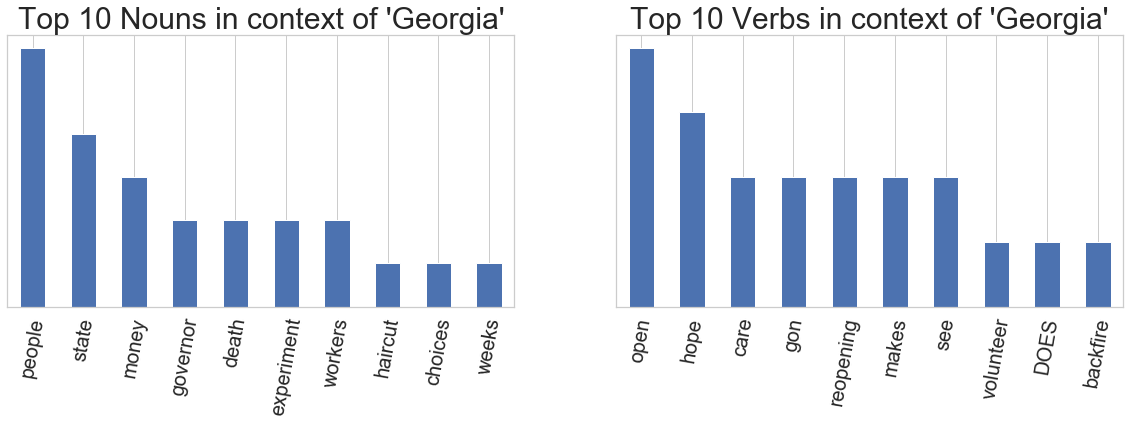

In [198]:
plt.subplot(1,2,1)
pd.Series(noun_abc).value_counts().head(10).plot(kind="bar",figsize=(20,5))
plt.title("Top 10 Nouns in context of 'Georgia'",fontsize=30)
plt.xticks(size=20,rotation=80)
plt.yticks([])
plt.subplot(1,2,2)
pd.Series(verb_abc).value_counts().head(10).plot(kind="bar",figsize=(20,5))

plt.title("Top 10 Verbs in context of 'Georgia'",fontsize=30)
plt.xticks(size=20,rotation=80)
plt.yticks([])

([], <a list of 0 Text yticklabel objects>)

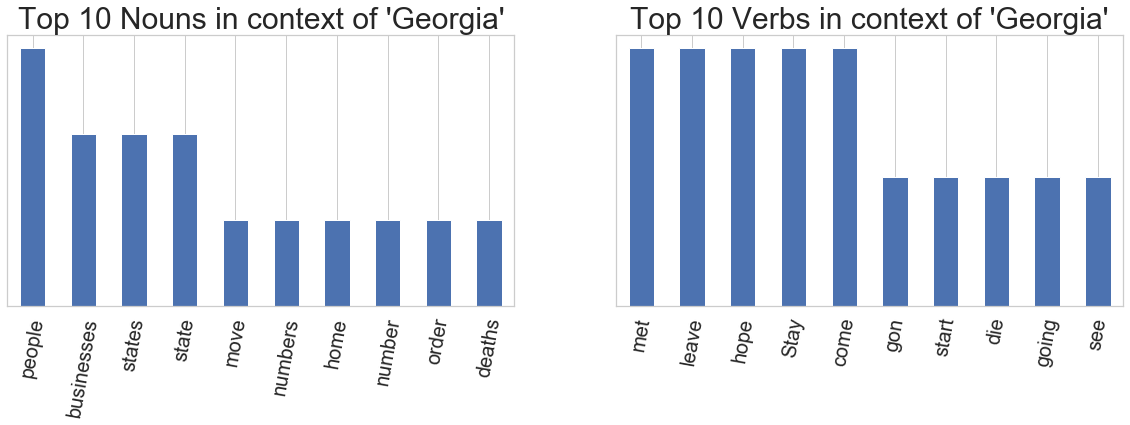

In [199]:
#For NBC News 

plt.subplot(1,2,1)
pd.Series(noun_nbc).value_counts().head(10).plot(kind="bar",figsize=(20,5))
plt.title("Top 10 Nouns in context of 'Georgia'",fontsize=30)
plt.xticks(size=20,rotation=80)
plt.yticks([])
plt.subplot(1,2,2)
pd.Series(verb_nbc).value_counts().head(10).plot(kind="bar",figsize=(20,5))

plt.title("Top 10 Verbs in context of 'Georgia'",fontsize=30)
plt.xticks(size=20,rotation=80)
plt.yticks([])

## Review about a aspect

#### Frequency about Kemp

In [204]:
#For ABC News
index_kemp_abc=data_abc['Comments'].str.match(r'(?=.*\bKemp\b).*$',case=False)
data_Kemp_abc=data_abc.loc[index_kemp_abc].copy()
data_Kemp_abc['polarity']=data_Kemp_abc['Comments'].map(lambda x: textblob.TextBlob(x).sentiment.polarity)



In [205]:
#For NBC News
index_kemp_nbc=data_nbc['Comments'].str.match(r'(?=.*\bKemp\b).*$',case=False)
data_Kemp_nbc=data_nbc.loc[index_kemp_nbc].copy()
data_Kemp_nbc['polarity']=data_Kemp_nbc['Comments'].map(lambda x: textblob.TextBlob(x).sentiment.polarity)





In [206]:
#For ABC News


pos_Kemp_abc=data_Kemp_abc.query("polarity>0")['Comments']
neg_Kemp_abc=data_Kemp_abc.query("polarity<0")['Comments']
print("The number of positve headlines were {} times the negative headlines".format(round(len(pos_Kemp_abc)/len(neg_Kemp_abc),2)))



The number of positve headlines were 1.0 times the negative headlines


In [207]:
#For NBC News
pos_Kemp_nbc=data_Kemp_nbc.query("polarity>0")['Comments']
neg_Kemp_nbc=data_Kemp_nbc.query("polarity<0")['Comments']
print("The number of positve headlines were {} times the negative headlines".format(round(len(pos_Kemp_nbc)/len(neg_Kemp_nbc),2)))

The number of positve headlines were 1.0 times the negative headlines


Text(0.5, 1.0, 'Frequency of Positive and Negative News about about Governer Kemp')

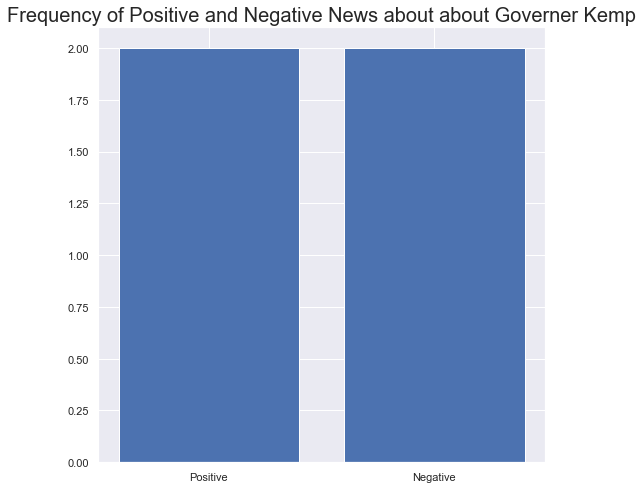

In [208]:
#For ABC News


plt.figure(figsize=(8,8))
plt.bar(["Positive","Negative"],[len(pos_Kemp_abc),len(neg_Kemp_abc)])
plt.title("Frequency of Positive and Negative News about about Governer Kemp",fontsize=20)

Text(0.5, 1.0, 'Frequency of Positive and Negative News about Governer Kemp')

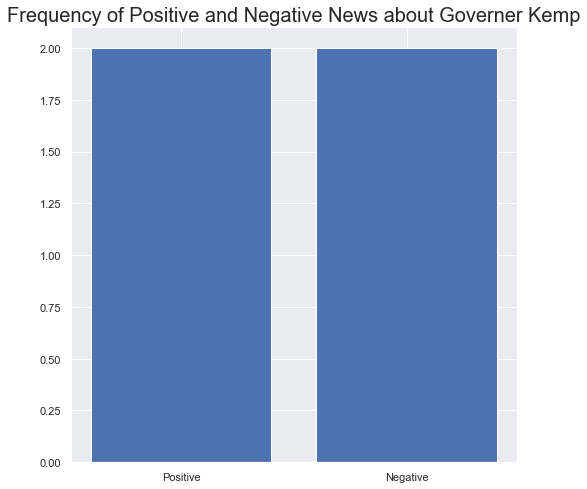

In [209]:
#For NBC News

plt.figure(figsize=(8,8))
plt.bar(["Positive","Negative"],[len(pos_Kemp_nbc),len(neg_Kemp_nbc)])
plt.title("Frequency of Positive and Negative News about Governer Kemp",fontsize=20)

#### This says there were equal number of people happy and unhappy with governer Kemp